<a href="https://colab.research.google.com/github/KrishnaBhatia/Customer_Churn_Analysis/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Churn Prediction

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/machine_learning/view_churn.csv' , sep = ';')
data2 = pd.read_csv('/content/drive/MyDrive/machine_learning/view_joined.csv' , sep = ';')

In [8]:
# Data to predict the model
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   6007 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                6007 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [7]:
# Prediction Data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  411 non-null    object 
 1   Gender                       411 non-null    object 
 2   Age                          411 non-null    int64  
 3   Married                      411 non-null    object 
 4   State                        411 non-null    object 
 5   Number_of_Referrals          411 non-null    int64  
 6   Tenure_in_Months             411 non-null    int64  
 7   Value_Deal                   411 non-null    object 
 8   Phone_Service                411 non-null    object 
 9   Multiple_Lines               411 non-null    object 
 10  Internet_Service             411 non-null    object 
 11  Internet_Type                411 non-null    object 
 12  Online_Security              411 non-null    object 
 13  Online_Backup       

In [9]:
#  Drop irrelevant columns
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

In [10]:
#  Encode categorical columns
columns_to_encode = ['Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service',
                     'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security',
                     'Online_Backup', 'Device_Protection_Plan', 'Premium_Support',
                     'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data',
                     'Contract', 'Paperless_Billing', 'Payment_Method']

In [11]:
# label encoder function
label_encoder = {}
for col in columns_to_encode:
    label_encoder[col] = LabelEncoder()
    data[col] = label_encoder[col].fit_transform(data[col])


In [12]:
#  Encode the target variable manually
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [13]:
#  Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']


In [14]:
#  Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#  Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [16]:
#  Predict and evaluate
y_pred = dt_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       841
           1       0.66      0.62      0.64       361

    accuracy                           0.79      1202
   macro avg       0.75      0.74      0.74      1202
weighted avg       0.79      0.79      0.79      1202


Confusion Matrix:
 [[723 118]
 [136 225]]


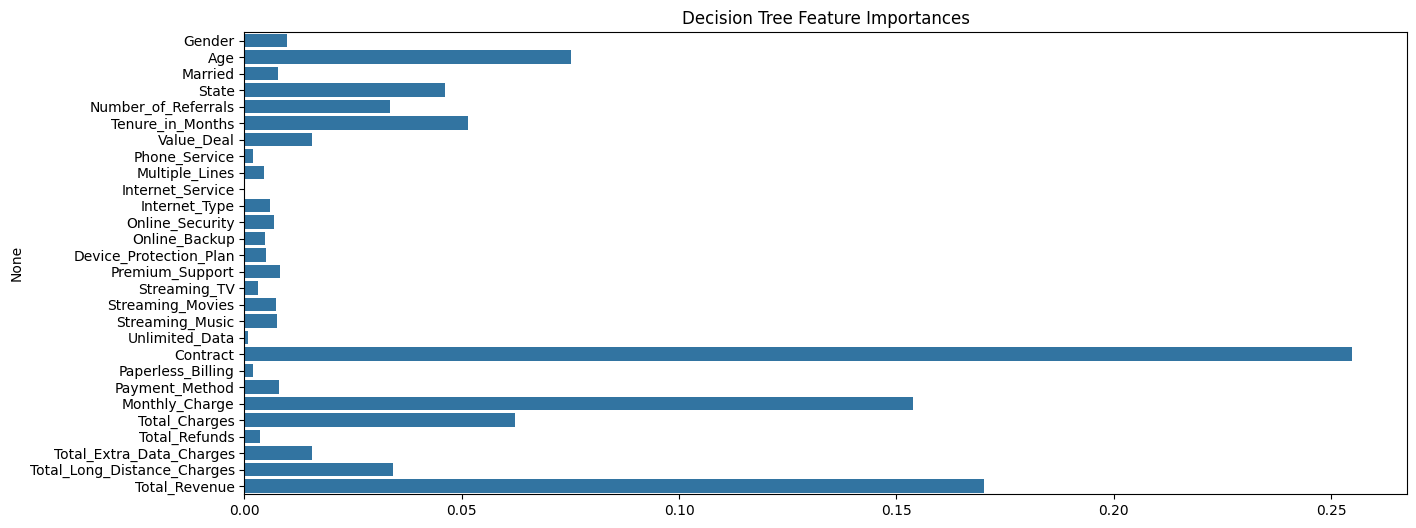

In [17]:
#  Visualize feature importance
importances = dt_model.feature_importances_
plt.figure(figsize=(15,6))
sns.barplot(x=importances, y=X.columns)
plt.title("Decision Tree Feature Importances")
plt.show()

In [18]:
 #Predict churn for new customers
original_data = data2.copy()
customer_ids = original_data['Customer_ID']
data2 = data2.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason', 'Customer_Status'], axis=1)

# Apply same label encoding as training data
for col in columns_to_encode:
    data2[col] = label_encoder[col].transform(data2[col])

new_prediction = dt_model.predict(data2)
original_data['Customer_status_predicted'] = new_prediction

# Filter for churned customers
original_data = original_data[original_data['Customer_status_predicted'] == 1]

# Save to CSV
original_data.to_csv('Customer_churn_prediction.csv', index=False)